In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/Housing.csv")

# Convert categorical variables to numerical (Yes/No to 1/0)
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Encode furnishing status (One-Hot Encoding)
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Define features (X) and target variable (y)
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

# Corrected: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Predict price for a new house (example input)
new_house = np.array([[7500, 4, 2, 3, 1, 0, 1, 0, 1, 2, 1, 0,1]])  # Example values
predicted_price = model.predict(new_house)
print(f"Predicted House Price: {predicted_price[0]}")


Mean Squared Error: 1754318687330.6633
R² Score: 0.6529242642153185
Predicted House Price: 7963759.744703565


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [ ]:
import numpy as np


In [ ]:
housing = pd.read_csv("/content/Housing.csv")

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
housing.describe()



,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
housing.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
import matplotlib.pyplot as plt

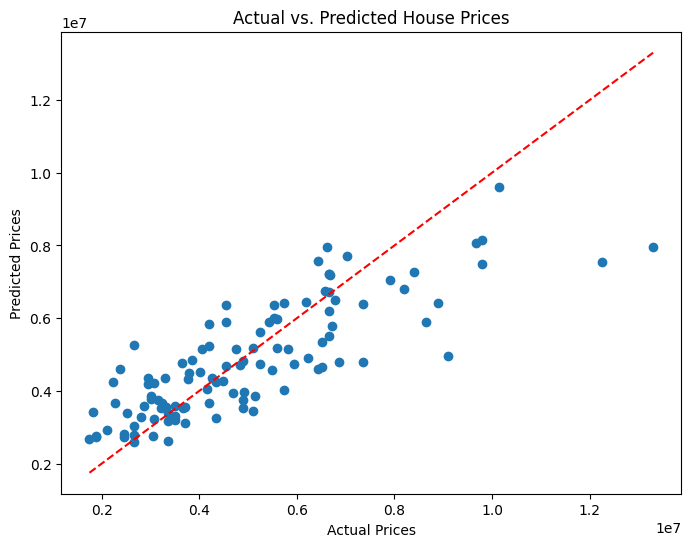

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line for reference
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

In [ ]:

# For demonstration, let's create dummy binary classifications:
y_test_binary = (y_test > y_test.mean()).astype(int)  # Example: Classify above mean as 1, below as 0
y_pred_binary = (y_pred > y_pred.mean()).astype(int) # Example: Classify above mean as 1, below as 0


# Calculate metrics
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test_binary, y_pred_binary).ravel()

# Calculate specificity and sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")


# Definitions:
# Accuracy: Overall correctness of the model (proportion of correctly classified instances).
# Precision:  Out of all the instances predicted as positive, how many are actually positive? (Ability to avoid false positives).
# F1 Score:  Harmonic mean of precision and recall, providing a balanced measure. Useful when dealing with imbalanced classes.
# Specificity:  Out of all the instances that are actually negative, how many did the model correctly predict as negative? (True Negative Rate).
# Sensitivity: Out of all the instances that are actually positive, how many did the model correctly predict as positive? (True Positive Rate, Recall).


Accuracy: 0.8440366972477065
Precision: 0.8409090909090909
F1 Score: 0.8131868131868132
Specificity: 0.8870967741935484
Sensitivity: 0.7872340425531915


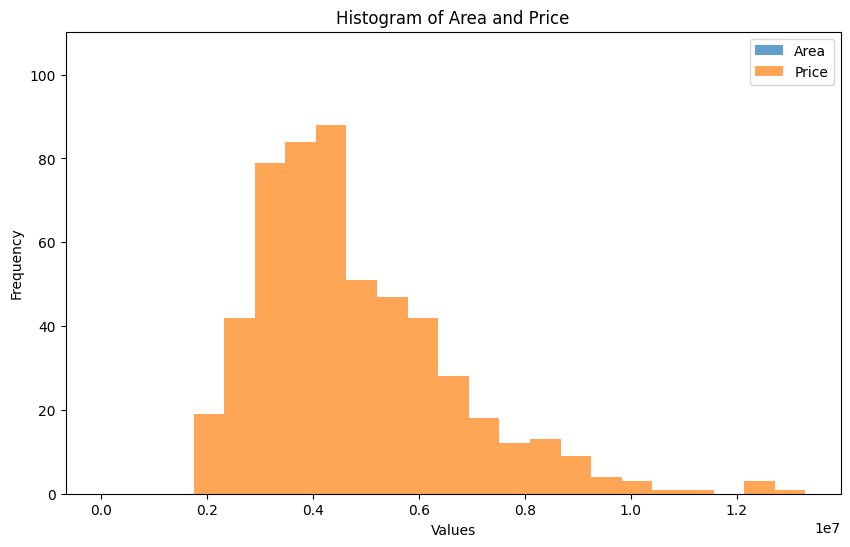


Covariance Matrix:
                area         price
area   4.709512e+06  2.175676e+09
price  2.175676e+09  3.498544e+12


In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(df['area'], bins=20, alpha=0.7, label='Area')
plt.hist(df['price'], bins=20, alpha=0.7, label='Price')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Area and Price')
plt.legend()
plt.show()

# Calculate covariance matrix
covariance_matrix = df[['area', 'price']].cov()
print("\nCovariance Matrix:\n", covariance_matrix)


In [ ]:

import seaborn as sns


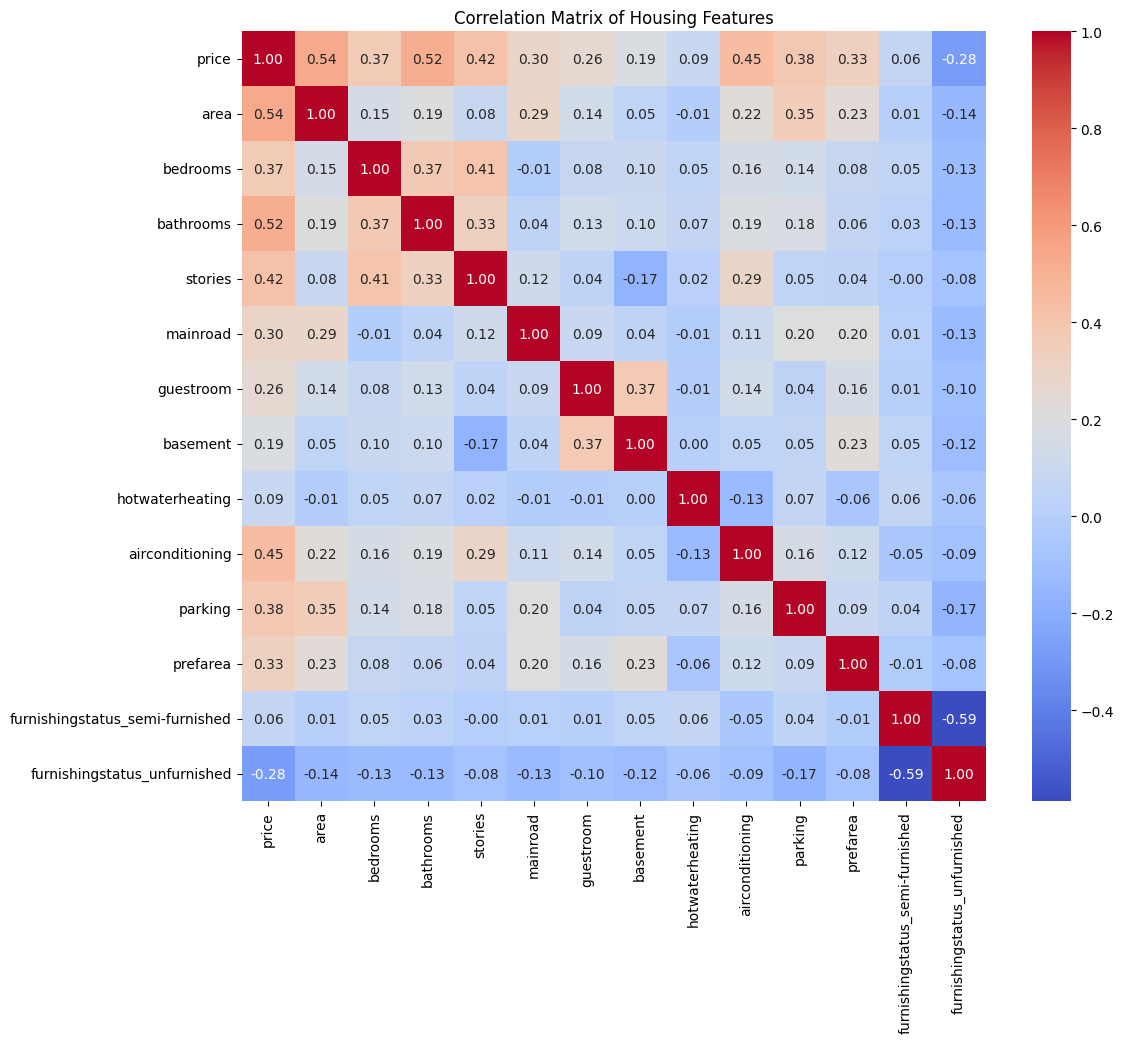

In [ ]:

correlation_matrix = df.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Housing Features')
plt.show()


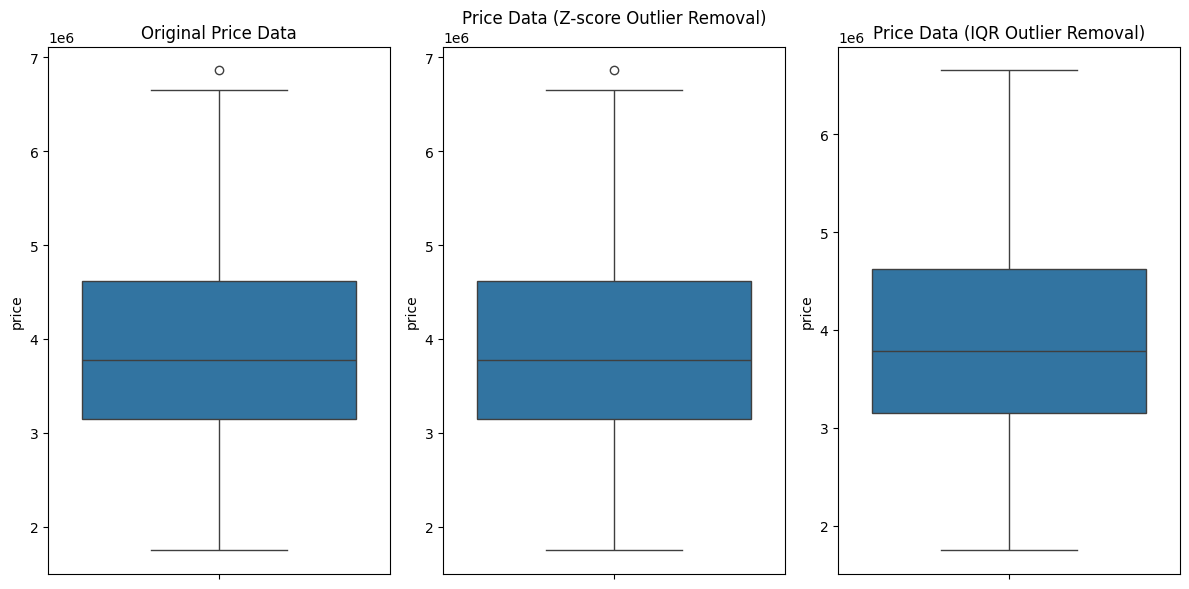

In [ ]:

# Function to remove outliers using Z-score
def remove_outliers_zscore(df, column, threshold=3):
    z = np.abs((df[column] - df[column].mean()) / df[column].std())
    df_filtered = df[(z < threshold)]
    return df_filtered

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


# Example usage: Remove outliers from the 'price' column using both methods
df_zscore_filtered = remove_outliers_zscore(df, 'price')
df_iqr_filtered = remove_outliers_iqr(df, 'price')


# Create box plots for the original and filtered data
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['price'])
plt.title('Original Price Data')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_zscore_filtered['price'])
plt.title('Price Data (Z-score Outlier Removal)')


plt.subplot(1, 3, 3)
sns.boxplot(y=df_iqr_filtered['price'])
plt.title('Price Data (IQR Outlier Removal)')

plt.tight_layout()
plt.show()


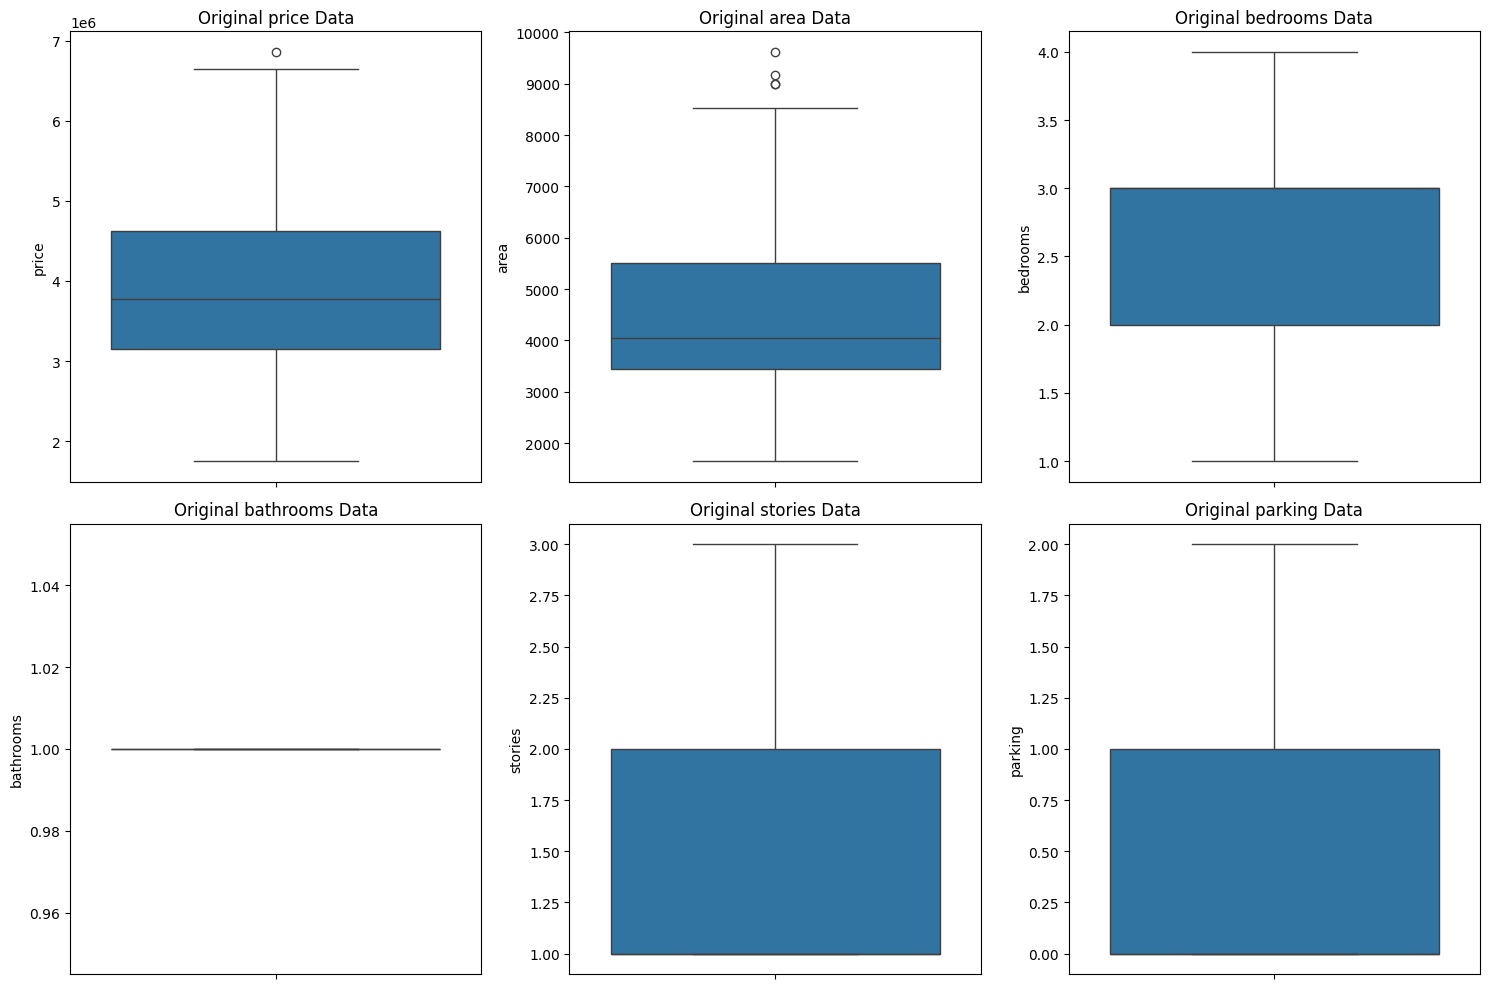

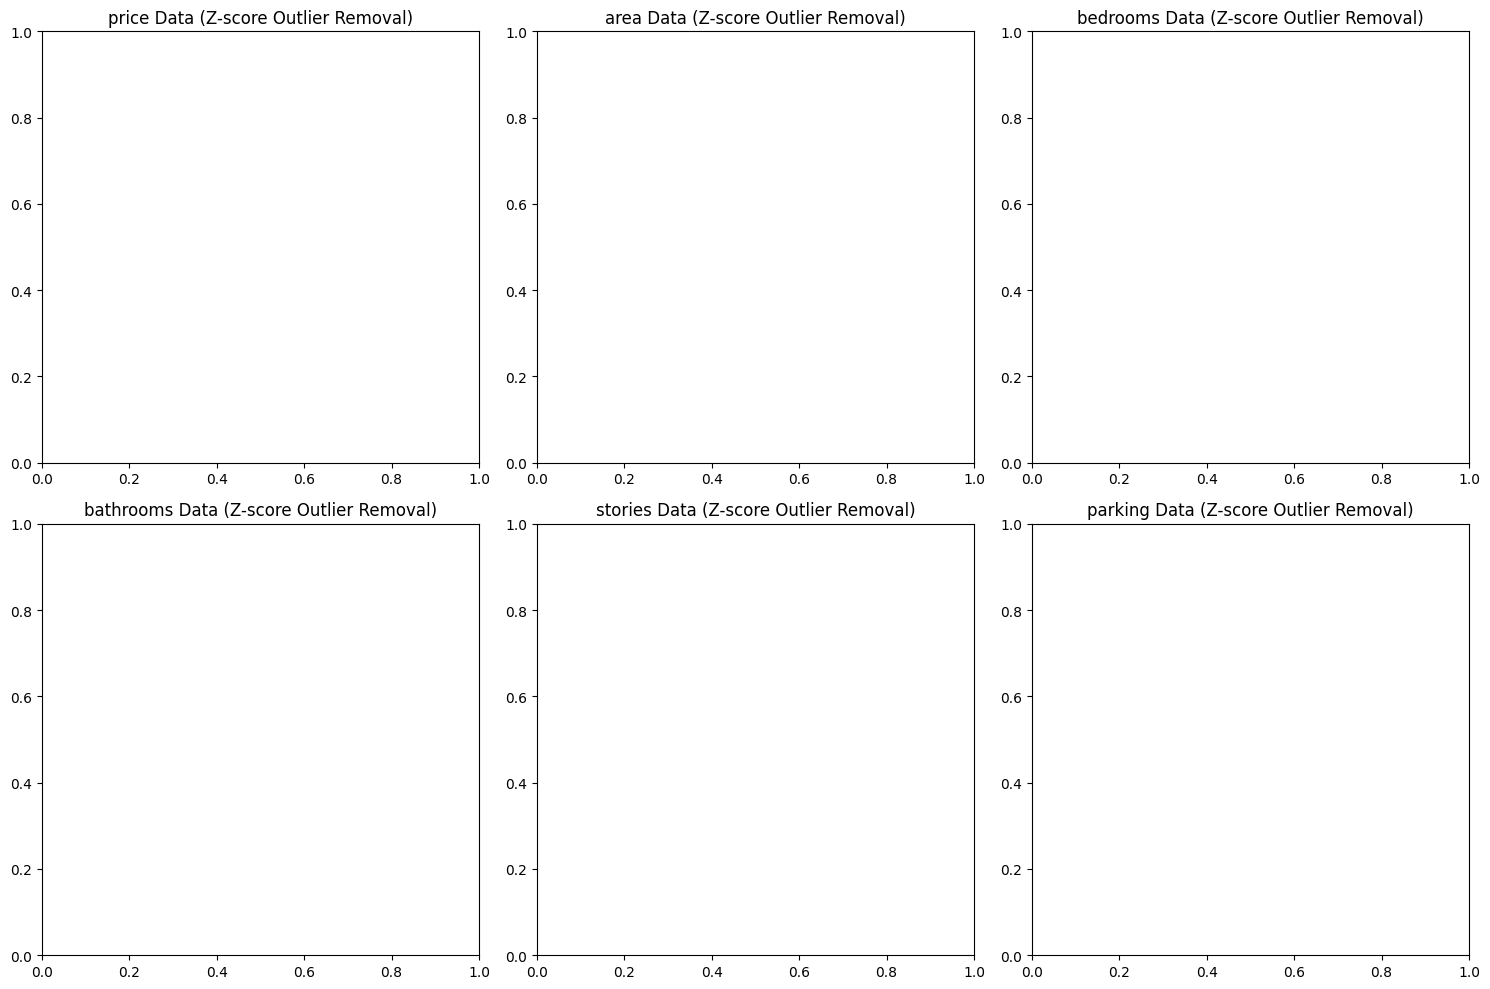

In [ ]:
# prompt: zscore outliner for all

# Function to remove outliers using Z-score for all numerical columns
def remove_outliers_zscore_all(df, threshold=3):
    numerical_cols = df.select_dtypes(include=np.number).columns
    for col in numerical_cols:
        z = np.abs((df[col] - df[col].mean()) / df[col].std())
        df = df[(z < threshold)]
    return df

# Example usage: Remove outliers from all numerical columns
df_filtered_all = remove_outliers_zscore_all(df)

# Create box plots for the original and filtered data for all numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
num_plots = len(numerical_cols)
num_cols = 3  # Number of columns in the plot grid
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Original {col} Data')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df_filtered_all[col])
    plt.title(f'{col} Data (Z-score Outlier Removal)')

plt.tight_layout()
plt.show()


In [ ]:
# prompt: now predict the house price

# Assuming you want to predict the price for a new house with the following features:
# area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus_semi-furnished, furnishingstatus_unfurnished

# Example input features (replace these with your desired values)
area = 7500 #@param {type:"number"}
bedrooms = 4 #@param {type:"number"}
bathrooms = 2 #@param {type:"number"}
stories = 3 #@param {type:"number"}
mainroad = 1 #@param ["0", "1"] {type:"raw"}
guestroom = 0 #@param ["0", "1"] {type:"raw"}
basement = 1 #@param ["0", "1"] {type:"raw"}
hotwaterheating = 0 #@param ["0", "1"] {type:"raw"}
airconditioning = 1 #@param ["0", "1"] {type:"raw"}
parking = 2 #@param {type:"number"}
prefarea = 1 #@param ["0", "1"] {type:"raw"}
furnishingstatus_semi_furnished = 0 #@param ["0", "1"] {type:"raw"}
furnishingstatus_unfurnished = 0 #@param ["0", "1"] {type:"raw"}

new_house = np.array([[area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus_semi_furnished, furnishingstatus_unfurnished]])
predicted_price = model.predict(new_house)
print(f"Predicted House Price: {predicted_price[0]}")


Predicted House Price: 7963759.744703565


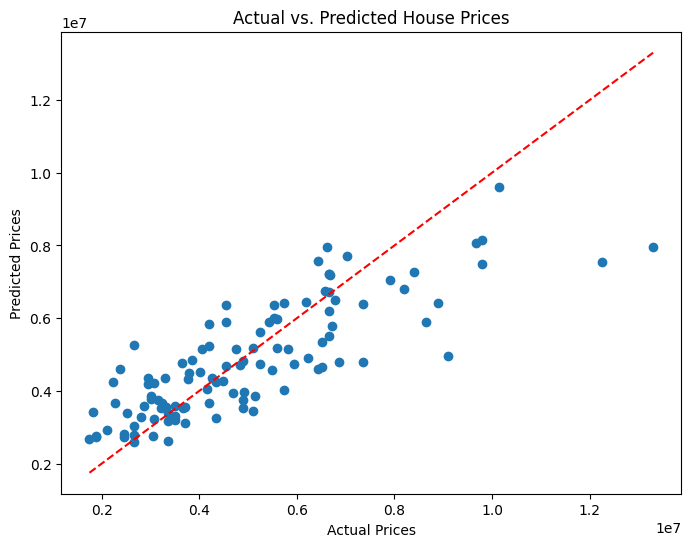

In [ ]:
# prompt: scatter plot

import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred' are already defined from your previous code
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line for reference
plt.show()
